In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# So all output comes through from Ipython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Mean: 4.7402
Variance: 4.44994895489549
Covariance Matrix:
          Throw1    Throw2
Throw1  2.224840 -0.011568
Throw2 -0.011568  2.248245


<Axes: xlabel='Sum', ylabel='proportion'>

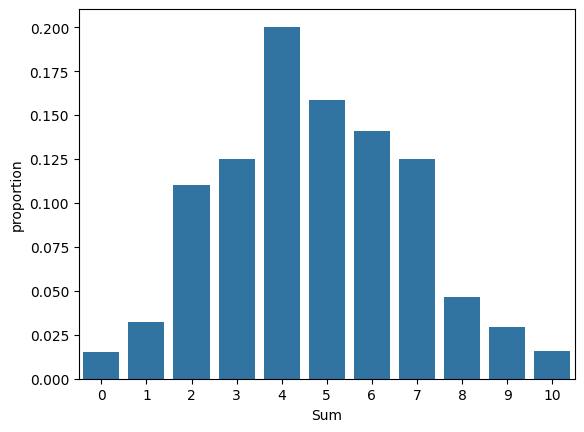

In [ ]:
dice = list(range(6)) ## The dice number could be any
prob =[1/8,1/8,3/8,1/8,1/8,1/8]
number_iterations = 10000

np.random.seed(42)

# Generate all throws at once
throws = np.random.choice(dice, size=(number_iterations, 2), p=prob)  ## for faired dice, simplely remove the parameter p=prob,

# Create DataFrame
results_df = pd.DataFrame({
    'Throw1': throws[:, 0],
    'Throw2': throws[:, 1],
    'Sum': throws.sum(axis=1)
})


print("Mean:", results_df['Sum'].mean())
print("Variance:", results_df['Sum'].var())

cov_matrix = results_df[['Throw1', 'Throw2']].cov()
print("Covariance Matrix:")
print(cov_matrix)


dice_two=results_df['Sum'].value_counts(normalize=True).sort_index()
sns.barplot(dice_two)

cum_sum=dice_two.cumsum() ## cumulativity probability 

## if the first throw is >3 then dont throw second time of the dice
results_df['Sum'] = np.where(results_df['Throw1'] >3, results_df['Sum']-results_df['Throw2'], results_df['Sum'])